<a href="https://colab.research.google.com/github/MarkLukyanov/ml_from_idea_to_mvp/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22EDA_cars_template_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подержанные автомобили

Датасет содержит информацию о характеристиках и ценах подержанных автомобилей в некоторой стране

## Импорт библиотек, константы

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
RANDOM_STATE = 42

In [ ]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/cars.csv"

## Загрузка и обзор данных

### Загрузка

In [ ]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `selling_price`: цена продажи, числовая

**Признаки**
- `name` (string): модель автомобиля
- `year` (numeric, int): год выпуска с завода-изготовителя
- `km_driven` (numeric, int): пробег на дату продажи
- `fuel` (categorical: _Diesel_ или _Petrol_, или _CNG_, или _LPG_, или _electric_): тип топлива
- `seller_type` (categorical: _Individual_ или _Dealer_, или _Trustmark Dealer_): продавец
- `transmission` (categorical: _Manual_ или _Automatic_): тип трансмиссии
- `owner` (categorical: _First Owner_ или _Second Owner_, или _Third Owner_, или _Fourth & Above Owner_): какой по счёту хозяин?
- `mileage` (string, по смыслу числовой): пробег, требует предобработки
- `engine` (string, по смыслу числовой): рабочий объем двигателя, требует предобработки
- `max_power` (string, по смыслу числовой): пиковая мощность двигателя, требует предобработки
- `torque` (string, по смыслу числовой, а то и 2): крутящий момент, требует предобработки
- `seats` (numeric, float; по смыслу categorical, int)

In [ ]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [ ]:
# случайные три записи из датасета
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2081,Chevrolet Captiva 2.2 LTZ AWD,2012,700000,50000,Diesel,Individual,Automatic,Second Owner,12.12 kmpl,2231 CC,184 bhp,424Nm@ 2000rpm,7.0
6974,Fiat Grande Punto 1.3 Dynamic (Diesel),2012,450000,70000,Diesel,Individual,Manual,First Owner,20.3 kmpl,1248 CC,75 bhp,197Nm@ 1750rpm,5.0
1816,Mahindra XUV500 W9 2WD,2018,1530000,40000,Diesel,Individual,Manual,First Owner,16.0 kmpl,2179 CC,138 bhp,330Nm@ 1600-2800rpm,7.0


In [ ]:
# размер датасета
df.shape

(6999, 13)

In [ ]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [ ]:
df.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


## Предобработка

Нужно привести к числовым стобцы mileage, engine, max_power; заполнить пропуски в них же + seats.

In [ ]:
mean = df['seats'].mean()
df['seats'].fillna(int(mean), inplace=True)

In [ ]:
for i in range(6999):
  if type(df['mileage'][i]) == str:
    a = df['mileage'][i].split()
    df['mileage'][i] = float(a[0])
  if type(df['engine'][i]) == str:
    a = df['engine'][i].split()
    df['engine'][i] = float(a[0])
  if type(df['max_power'][i]) == str:
    a = df['max_power'][i].split()
    if len(a) == 1:
      df['max_power'][i] = None
    else:
      df['max_power'][i] = float(a[0])

<ipython-input-101-be886f8838ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'][i] = float(a[0])
<ipython-input-101-be886f8838ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine'][i] = float(a[0])
<ipython-input-101-be886f8838ed>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_power'][i] = float(a[0])
<ipython-input-101-be886f8838ed>:11: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [ ]:
mean = df['mileage'].mean()
df['mileage'].fillna(mean, inplace=True)
mean = df['engine'].mean()
df['engine'].fillna(mean, inplace=True)
mean = df['max_power'].mean()
df['max_power'].fillna(mean, inplace=True)


In [ ]:
df['torque'].fillna("unknown", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6999 non-null   float64
 9   engine         6999 non-null   float64
 10  max_power      6999 non-null   float64
 11  torque         6999 non-null   object 
 12  seats          6999 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 711.0+ KB


* Все пропуски заполнены средними значениями
* Torque не получилось обобщенно предобработать, так как при приведении типов вылазиет очень много частных случаев

## Исследование данных

<Axes: >

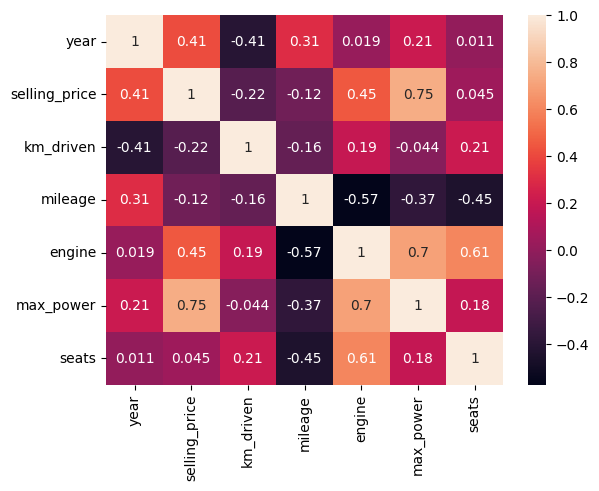

In [ ]:
# посмотрим на корреляцию
corr = df[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].corr()
sns.heatmap(corr, annot=True)

Видим наибольшую взаимосвязь между ценой и мощностью, а также - годом выпуска, пробегом и типом двигателя.
У engine и max_power, а также у engine и seats высокий коэффициент корреляции (> 0.6) => возможна мультиколлинеарность

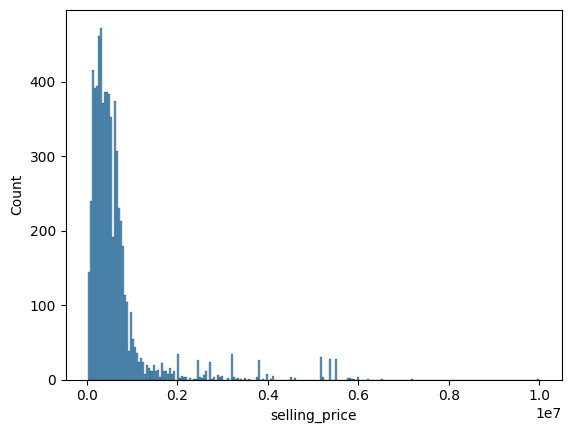

<Axes: xlabel='year', ylabel='Count'>

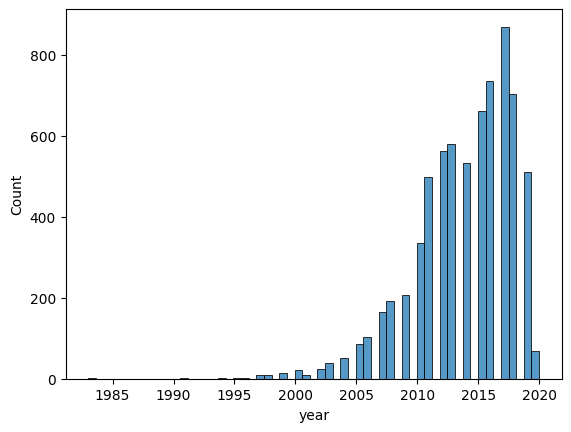

In [ ]:
sns.histplot(df['selling_price'])
plt.show()
sns.histplot(df['year'])

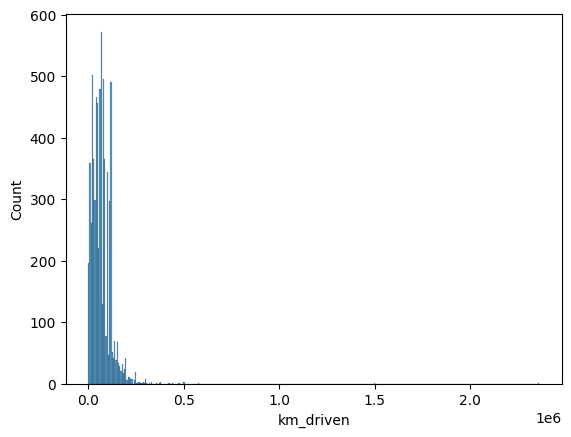

<Axes: xlabel='mileage', ylabel='Count'>

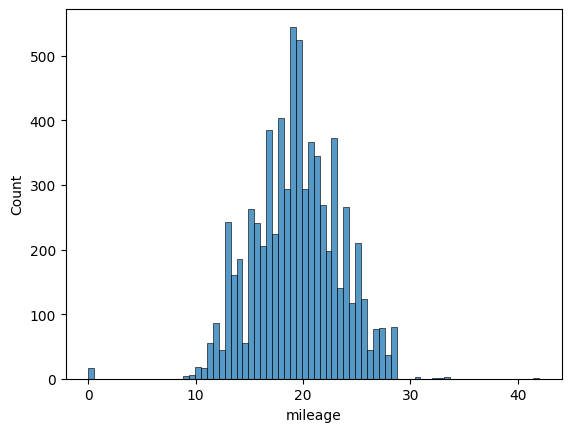

In [ ]:
sns.histplot(df['km_driven'])
plt.show()
sns.histplot(df['mileage'])

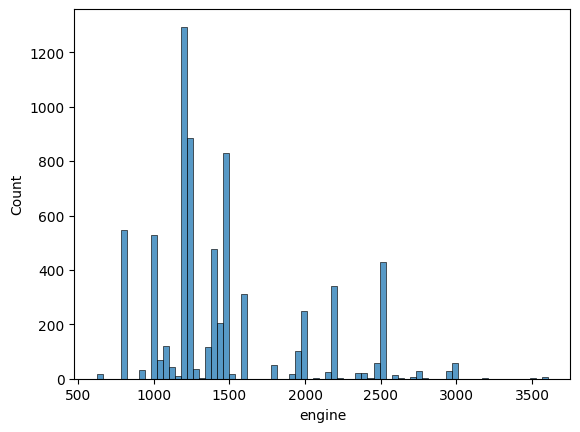

<Axes: xlabel='max_power', ylabel='Count'>

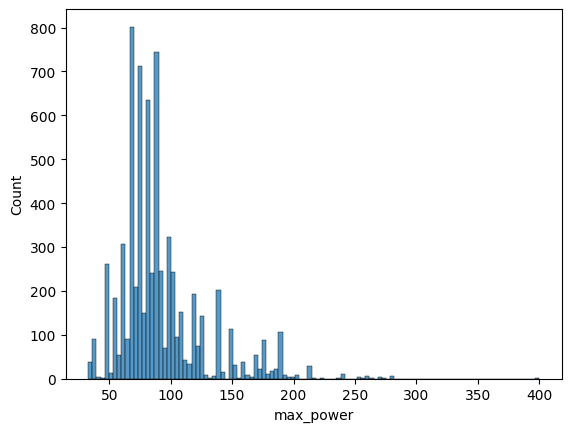

In [ ]:
sns.histplot(df['engine'])
plt.show()
sns.histplot(df['max_power'])

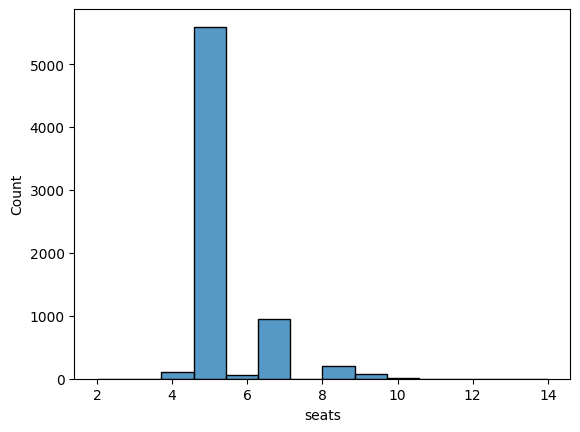

In [ ]:
sns.histplot(df['seats'])
plt.show()

Есть выбросы

<Axes: xlabel='fuel', ylabel='count'>

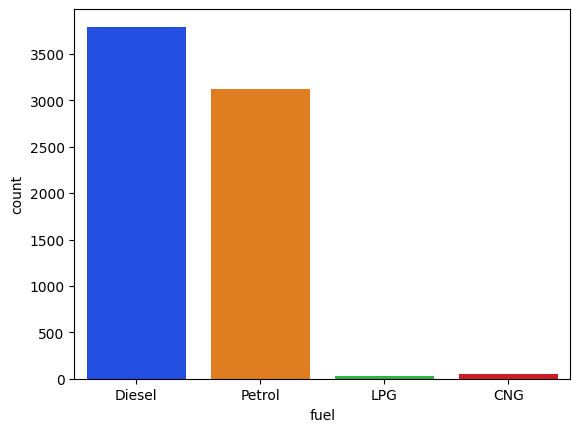

In [ ]:
sns.countplot(x='fuel', data = df, palette='bright')

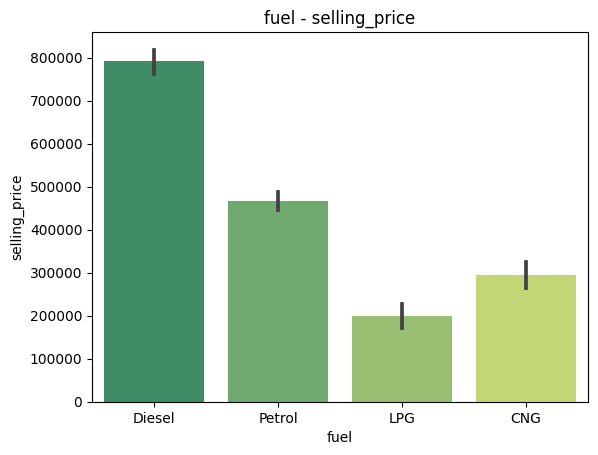

In [ ]:
sns.barplot(x='fuel', y='selling_price', data = df, palette='summer')
plt.title('fuel - selling_price')
plt.show()

<Axes: xlabel='seller_type', ylabel='count'>

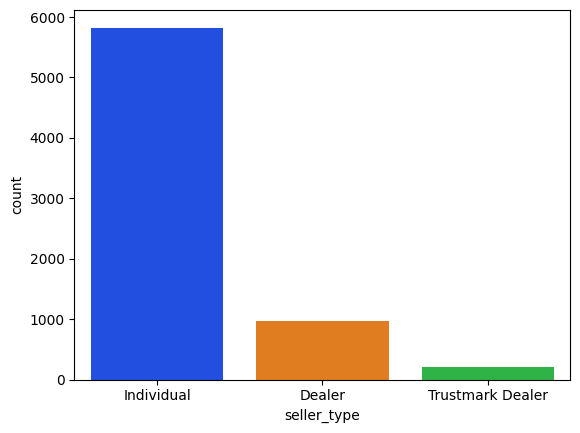

In [ ]:
sns.countplot(x='seller_type', data = df, palette='bright')

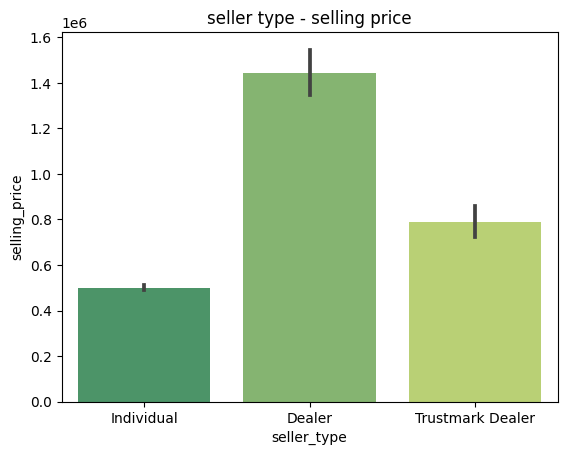

In [ ]:
sns.barplot(x='seller_type', y='selling_price', data = df, palette='summer')
plt.title('seller type - selling price')
plt.show()

<Axes: xlabel='transmission', ylabel='count'>

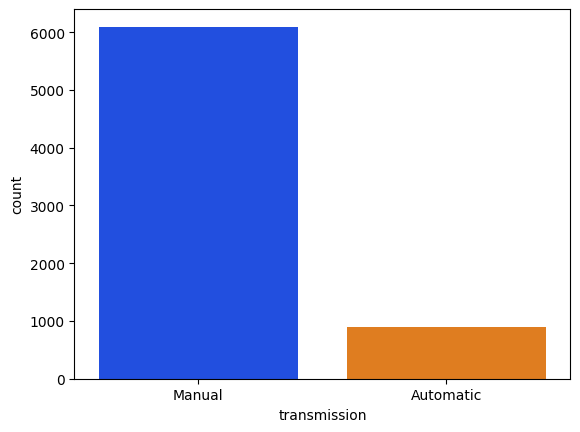

In [ ]:
sns.countplot(x='transmission', data = df, palette='bright')

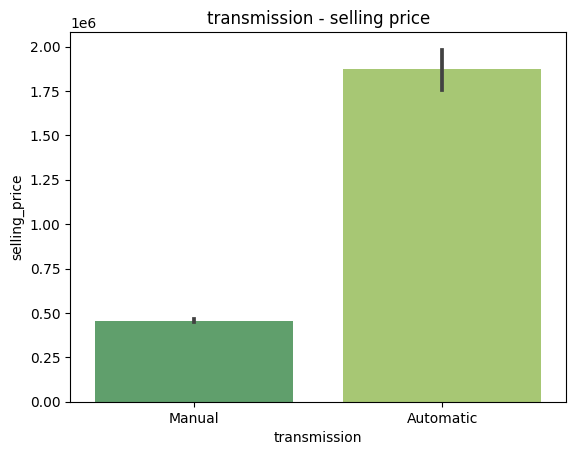

In [ ]:
sns.barplot(x='transmission', y='selling_price', data = df, palette='summer')
plt.title('transmission - selling price')
plt.show()

<Axes: xlabel='owner', ylabel='count'>

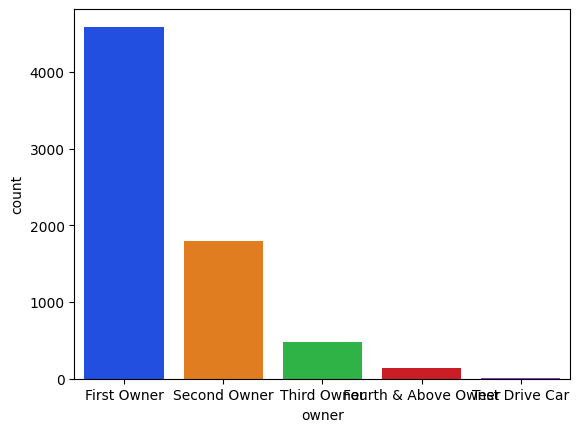

In [ ]:
sns.countplot(x='owner', data = df, palette='bright')

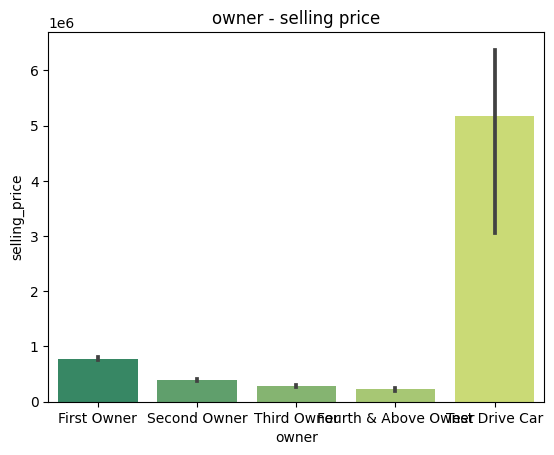

In [ ]:
sns.barplot(x='owner', y='selling_price', data = df, palette='summer')
plt.title('owner - selling price')
plt.show()

* Видим, что на цену влияют все показатели

## Машинное обучение

Данная задача представляет собой задачу множественной линейной регрессии, так как нужно предсказать стоимость при учете нескольких параметров

### Обучение без масштабирования и кодирования категориальных признаков

In [ ]:
X = df.drop(['selling_price'], axis=1) #матрица объект-признак

y = df['selling_price'] # целевая переменная (target)

X.head(3)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0


In [ ]:
y.head(3)

0    450000
1    370000
2    225000
Name: selling_price, dtype: int64

In [ ]:
X.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque'], axis=1, inplace=True)
X.head(3)

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248.0,74.00,5.0
1,2014,120000,21.14,1498.0,103.52,5.0
2,2010,127000,23.00,1396.0,90.00,5.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((5249, 6), (1750, 6))

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
# Посмотрим на показатели MAE, MSE и R^2
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

print("Показатели модели")
print("MAPE =", mean_absolute_percentage_error(y_test, pred)) # наилучшее - 0.0
print("MSE =", mean_squared_error(y_test, pred)) # наилучшее - 0.0
print("R^2 =", r2_score(y_test, pred)) # наилучшее - 1.0

Показатели модели
MAPE = 0.9112956788536997
MSE = 256761120365.168
R^2 = 0.6063450827195125


In [ ]:
model.coef_

array([ 3.96105821e+04, -1.80375811e+00,  1.06349269e+04,  1.23972100e+02,
        1.57066279e+04, -6.99271949e+04])

In [ ]:
importances = pd.DataFrame({'weights': model.coef_, 'features': X_train.columns}).sort_values(by='weights')
importances.head(10)

,weights,features
5,-69927.194914,seats
1,-1.803758,km_driven
3,123.972100,engine
2,10634.926908,mileage
4,15706.627877,max_power
0,39610.582142,year


### Обучение с масштабированием и One Hot Encoding

In [ ]:
df['selling_price'].skew()

4.210755727853011

Распределение цен далеко от нормального и смещено вправо. Прологарифмируем их



Text(0.5, 1.0, 'log_prices with skew 0.2442653909588964')

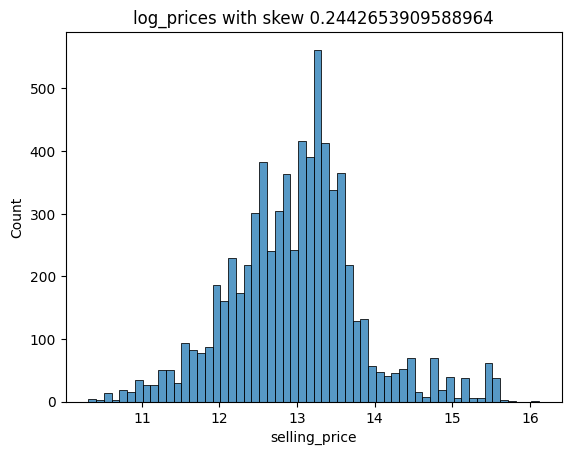

In [ ]:
prices_log = np.log(df['selling_price'])
sns.histplot(prices_log)
plt.title(f'log_prices with skew {prices_log.skew()}')


Закодируем категориальные признаки fuel, seller_type, transmission, owner

In [ ]:
pd.get_dummies(df['fuel'])

,CNG,Diesel,LPG,Petrol
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
6994,0,0,0,1
6995,0,1,0,0
6996,0,1,0,0
6997,0,1,0,0


In [ ]:
X = X.join(pd.get_dummies(df['fuel']))
X = X.join(pd.get_dummies(df['seller_type']))
X = X.join(pd.get_dummies(df['transmission']))
X = X.join(pd.get_dummies(df['owner']))
X.head()

,year,km_driven,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,145500,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,2014,120000,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2010,127000,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
3,2007,120000,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2017,45000,20.14,1197.0,81.86,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X) # вычислить min, max по каждому столбцу

X = pd.DataFrame(ss.transform(X), columns=X.columns)

X.head()

,year,km_driven,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,0.837838,0.061640,0.557143,0.209396,0.112200,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.837838,0.050837,0.503333,0.293289,0.192593,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.729730,0.053803,0.547619,0.259060,0.155773,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.648649,0.050837,0.383333,0.226174,0.150871,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.918919,0.019064,0.479524,0.192282,0.133606,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((5249, 20), (1750, 20))

In [ ]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
# Посмотрим на показатели MAE, MSE и R^2
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

print("Показатели модели")
print("MAPE =", mean_absolute_percentage_error(y_test, pred)) # наилучшее - 0.0
print("MSE =", mean_squared_error(y_test, pred)) # наилучшее - 0.0
print("R^2 =", r2_score(y_test, pred)) # наилучшее - 1.0

Показатели модели
MAPE = 0.018565720766237522
MSE = 0.10032719402808163
R^2 = 0.851261087759311


Все показатели существенно улучшились!

In [ ]:
importances = pd.DataFrame({'weights': model.coef_, 'features': X_train.columns}).sort_values(by='weights')
importances.head(30)

,weights,features
11,-9.689034e+12,Individual
12,-9.689034e+12,Trustmark Dealer
10,-9.689034e+12,Dealer
1,-1.653443e+00,km_driven
5,3.054651e-01,seats
2,3.529936e-01,mileage
3,7.063670e-01,engine
4,3.569487e+00,max_power
0,4.079585e+00,year
6,4.301483e+11,CNG


In [ ]:
# import pickle

# with open('model.pickle', 'wb') as f:
#     pickle.dump(model, f)

# а так модель можно загрузить из файла:
# with open('model.pickle', 'rb') as f:
#     model = pickle.load(f)